# Importing the data
# EDA 
# Pre-processing
# Modeling
# Cross-validation
# Evaluation
# Saving the best model

In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

# Loading the data

In [5]:
df = pd.read_csv(r"car_price_prediction.csv")

df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


# Data Cleaning

In [6]:
# Dropping the ID column cause it's useless

df.drop(['ID'] , axis=1 , inplace=True)

In [7]:
print(df['Fuel type'].value_counts())

# Drop the row where 'Fuel type' is 'Hydrogen' since there's only 1 instance from it 
df = df[df['Fuel type'] != 'Hydrogen']

# Check the value counts
print(df['Fuel type'].value_counts())

Petrol            10150
Diesel             4036
Hybrid             3578
LPG                 892
CNG                 494
Plug-in Hybrid       86
Hydrogen              1
Name: Fuel type, dtype: int64
Petrol            10150
Diesel             4036
Hybrid             3578
LPG                 892
CNG                 494
Plug-in Hybrid       86
Name: Fuel type, dtype: int64


In [8]:
# same shit here
print(df['Cylinders'].value_counts())

df = df[(df['Cylinders'] != 14.0) & (df['Cylinders'] != 7.0) & (df['Cylinders'] != 9.0)]

# Check the value counts
print(df['Cylinders'].value_counts())


4.0     14367
6.0      3461
8.0       991
5.0       169
3.0       107
2.0        42
12.0       38
1.0        38
10.0       12
16.0        5
7.0         4
14.0        1
9.0         1
Name: Cylinders, dtype: int64
4.0     14367
6.0      3461
8.0       991
5.0       169
3.0       107
2.0        42
12.0       38
1.0        38
10.0       12
16.0        5
Name: Cylinders, dtype: int64


In [9]:
df['Airbags'].value_counts()

4     5823
12    5653
0     2405
8     1606
6     1310
2     1066
10     849
5      104
16      93
7       86
1       75
9       62
3       37
11      32
14      20
15       7
13       2
Name: Airbags, dtype: int64

In [10]:
print(f" % of each value in the Airbags feature : \n{(df['Airbags'].value_counts(normalize=True))*100}")

df = df[(df['Airbags'] != 13) & (df['Airbags'] != 15)]

# Check the value counts
print(df['Airbags'].value_counts())

 % of each value in the Airbags feature : 
4     30.280811
12    29.396776
0     12.506500
8      8.351534
6      6.812272
2      5.543422
10     4.414977
5      0.540822
16     0.483619
7      0.447218
1      0.390016
9      0.322413
3      0.192408
11     0.166407
14     0.104004
15     0.036401
13     0.010400
Name: Airbags, dtype: float64
4     5823
12    5653
0     2405
8     1606
6     1310
2     1066
10     849
5      104
16      93
7       86
1       75
9       62
3       37
11      32
14      20
Name: Airbags, dtype: int64


<h2>We have 19221 Instances and 17 features</h2>

In [11]:
df.shape

(19221, 17)

<h2>we have missing values in the Levy feature we will convert it to NAN and then deal with it later </h2>

In [12]:
df.isna().sum()

Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [13]:
df.nunique()

Price               2315
Levy                 559
Manufacturer          65
Model               1588
Prod. year            54
Category              11
Leather interior       2
Fuel type              6
Engine volume        107
Mileage             7682
Cylinders             10
Gear box type          4
Drive wheels           3
Doors                  3
Wheel                  2
Color                 16
Airbags               15
dtype: int64

In [14]:
# number of instances with - in the levy column
len(df[df['Levy'] == '-'])

5808

In [15]:
df['Levy'].replace({'-' : np.NaN} , inplace = True)

In [16]:
len(df[df['Levy'] == '-'])

0

<h2>Feature Engineering</h2>

In [17]:
df['Prod. year'].max()

2020

In [18]:
# since we have the max value in the year feature is 2020 so we can calculate the age of each car at that time by doing this 

df['age'] = (df['Prod. year'].max()+1) - df['Prod. year']

print(df['age'].head())

# now i don't need the production year column so I'm going to drop it 

df.drop(['Prod. year'] , axis = 1 , inplace = True)

0    11
1    10
2    15
3    10
4     7
Name: age, dtype: int64


In [19]:
# removing the KM from the Mileage feature and convering it to a int

df['Mileage'] = df['Mileage'].str.extract(r'(\d+)').astype(int)

df['Mileage'].head()

0    186005
1    192000
2    200000
3    168966
4     91901
Name: Mileage, dtype: int32

In [20]:
# Step 1: Create the 'Turbo' column where '1' if 'Turbo' is in the 'Engine volume' and '0' otherwise
df['Turbo'] = df['Engine volume'].apply(lambda x: 1 if 'Turbo' in str(x) else 0)

# Step 2: Remove the word 'Turbo' from the 'Engine volume' column
df['Engine volume'] = df['Engine volume'].str.replace(' Turbo', '', regex=False)

# Optionally, convert 'Engine volume' to numeric if it's not already
df['Engine volume'] = pd.to_numeric(df['Engine volume'], errors='coerce')

# Show the resulting DataFrame
print(df[['Engine volume', 'Turbo']].head())

   Engine volume  Turbo
0            3.5      0
1            3.0      0
2            1.3      0
3            2.5      0
4            1.3      0


In [21]:
df['Turbo'].value_counts()

0    17293
1     1928
Name: Turbo, dtype: int64

In [22]:
x = df['Engine volume'].value_counts(ascending=True)

print(x[:20])

3.1     1
7.3     1
5.8     1
0.5     1
6.8     1
6.7     1
5.2     1
3.9     2
6.4     2
20.0    2
Name: Engine volume, dtype: int64


In [23]:
# Get the value counts for 'Engine volume'
value_counts = df['Engine volume'].value_counts()

# Assign the filtered DataFrame back to the original DataFrame
df = df[df['Engine volume'].map(value_counts) > 3]


In [24]:
df['Engine volume'].value_counts(ascending=True)

0.1       4
5.6       5
6.0       5
5.4       6
6.3       7
3.4       7
5.3       8
0.6       8
0.8       9
1.1       9
0.2      10
2.1      10
0.0      10
4.3      12
2.6      18
4.5      19
4.2      20
2.9      21
0.4      23
0.7      25
6.2      25
3.8      32
4.8      36
5.7      52
5.5      68
2.8      70
1.9      70
5.0      70
3.7      81
1.2     105
4.4     106
4.0     111
4.7     116
1.0     125
3.6     128
2.3     132
3.2     172
2.7     182
1.7     195
3.3     204
4.6     375
2.2     445
1.4     531
1.3     536
2.4    1036
3.0    1100
3.5    1269
1.5    1391
1.6    1575
1.8    1936
2.5    2368
2.0    4322
Name: Engine volume, dtype: int64

In [25]:
x = (df['Model'].value_counts(ascending=True , normalize=True))*100

x[:1200]

626              0.005208
240              0.005208
BRZ              0.005208
Fusion Bybrid    0.005208
159              0.005208
                   ...   
xD               0.015625
Vanette          0.015625
Sprinter 313     0.015625
Dart             0.015625
Expedition       0.015625
Name: Model, Length: 1200, dtype: float64

In [26]:
# Define the threshold for grouping less frequent categories
threshold = 0.1  

# Create a mask for the values above the threshold
mask = x >= threshold

# Replace values below the threshold with 'Others'
x_grouped = x[mask]
x_grouped = x_grouped.append(pd.Series({'Others': x[~mask].sum()}))

# If you want to modify the original column in df:
df['Model_grouped'] = df['Model'].apply(lambda x: x if (x in x_grouped.index) else 'Others')

df.drop(['Model'], axis=1 , inplace=True)


In [27]:
df['Model_grouped'].value_counts()

Others     3626
Prius      1080
Sonata     1077
Camry       937
Elantra     922
           ... 
325          21
Picanto      20
IS 250       20
Airtrek      20
SX4          20
Name: Model_grouped, Length: 133, dtype: int64

In [28]:
x = df['Manufacturer'].value_counts(ascending=True)

x[:20]

GREATWALL       1
ZAZ             1
LAMBORGHINI     1
ASTON MARTIN    1
SATURN          1
HAVAL           1
BENTLEY         1
PONTIAC         1
TESLA           1
LANCIA          1
SAAB            2
FERRARI         2
სხვა            2
SEAT            2
ROLLS-ROYCE     2
ROVER           3
MASERATI        4
ISUZU           4
MERCURY         4
ALFA ROMEO      4
Name: Manufacturer, dtype: int64

In [29]:
# # Same shit here 
# value_counts = df['Manufacturer'].value_counts()

# # Assign the filtered DataFrame back to the original DataFrame
# df = df[df['Manufacturer'].map(value_counts) > 4]

In [30]:
# Define the threshold for grouping less frequent categories
threshold = 10 # e.g., 1% of total values

# Create a mask for the values above the threshold
mask = x >= threshold

# Replace values below the threshold with 'Others'
x_grouped = x[mask]
x_grouped = x_grouped.append(pd.Series({'Others': x[~mask].sum()}))

# If you want to modify the original column in df:
df['Manufacturer_grouped'] = df['Manufacturer'].apply(lambda x: x if (x in x_grouped.index) else 'Others')

df.drop(['Manufacturer'], axis=1 , inplace=True)

In [31]:
df['Manufacturer_grouped'].value_counts()

HYUNDAI          3766
TOYOTA           3657
MERCEDES-BENZ    2072
FORD             1109
CHEVROLET        1068
BMW              1047
LEXUS             982
HONDA             976
NISSAN            658
VOLKSWAGEN        579
SSANGYONG         441
KIA               421
OPEL              397
MITSUBISHI        289
SUBARU            275
AUDI              253
MAZDA             182
JEEP              137
DAEWOO             91
DODGE              87
FIAT               77
SUZUKI             76
Others             64
PORSCHE            53
LAND ROVER         49
MINI               48
VAZ                45
JAGUAR             42
RENAULT            37
INFINITI           30
CHRYSLER           26
SKODA              20
VOLVO              19
PEUGEOT            17
LINCOLN            15
GMC                15
ACURA              15
BUICK              15
CADILLAC           14
DAIHATSU           13
UAZ                12
GAZ                11
Name: Manufacturer_grouped, dtype: int64

# EDA

In [32]:
df.describe()

,Price,Engine volume,Mileage,Cylinders,Airbags,age,Turbo
count,1.920000e+04,19200.000000,1.920000e+04,19200.000000,19200.000000,19200.000000,19200.000000
mean,1.855618e+04,2.304422,1.534208e+06,4.579323,6.578437,10.077500,0.100365
std,1.907575e+05,0.853964,4.845035e+07,1.193005,4.316577,5.656949,0.300493
min,1.000000e+00,0.000000,0.000000e+00,1.000000,0.000000,1.000000,0.000000
25%,5.331000e+03,1.800000,7.021400e+04,4.000000,4.000000,6.000000,0.000000
50%,1.317200e+04,2.000000,1.260295e+05,4.000000,6.000000,9.000000,0.000000
75%,2.217375e+04,2.500000,1.890000e+05,4.000000,12.000000,12.000000,0.000000
max,2.630750e+07,6.300000,2.147484e+09,16.000000,16.000000,82.000000,1.000000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19200 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Price                 19200 non-null  int64  
 1   Levy                  13403 non-null  object 
 2   Category              19200 non-null  object 
 3   Leather interior      19200 non-null  object 
 4   Fuel type             19200 non-null  object 
 5   Engine volume         19200 non-null  float64
 6   Mileage               19200 non-null  int32  
 7   Cylinders             19200 non-null  float64
 8   Gear box type         19200 non-null  object 
 9   Drive wheels          19200 non-null  object 
 10  Doors                 19200 non-null  object 
 11  Wheel                 19200 non-null  object 
 12  Color                 19200 non-null  object 
 13  Airbags               19200 non-null  int64  
 14  age                   19200 non-null  int64  
 15  Turbo              

In [34]:
df.dtypes

Price                     int64
Levy                     object
Category                 object
Leather interior         object
Fuel type                object
Engine volume           float64
Mileage                   int32
Cylinders               float64
Gear box type            object
Drive wheels             object
Doors                    object
Wheel                    object
Color                    object
Airbags                   int64
age                       int64
Turbo                     int64
Model_grouped            object
Manufacturer_grouped     object
dtype: object

In [35]:
def plot_dist(column, x_label, title, y_label='frequency'):
    plt.figure(figsize=(10, 6))
    
    # Dynamic bin size
    bin_width = (column.max() - column.min()) / 50
    bins = int((column.max() - column.min()) / bin_width)
    
    sns.histplot(column, kde=True, color='skyblue', bins=bins)
    
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    mean = column.mean()
    median = column.median()
    
    # Plot mean and median
    plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
    plt.axvline(median, color='green', label=f'Median: {median:.2f}')
    
    # Annotations
    plt.text(mean, plt.ylim()[1] * 0.9, f'Mean: {mean:.2f}', color='red', ha='center')
    plt.text(median, plt.ylim()[1] * 0.85, f'Median: {median:.2f}', color='green', ha='center')
    
    plt.legend()
    
    plt.tight_layout()
    plt.show()

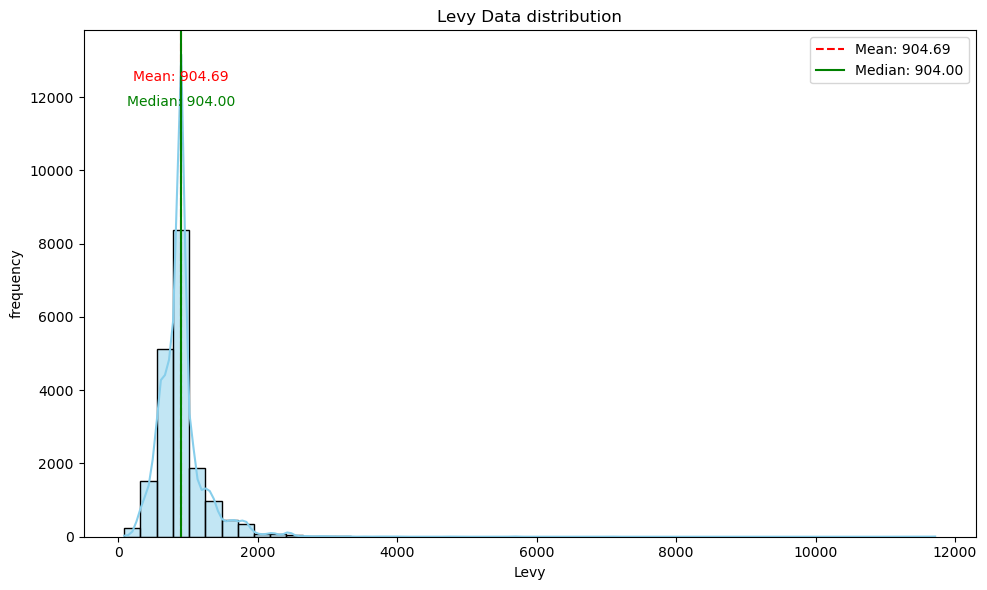

In [36]:
# Convert 'Levy' to numeric, replacing non-numeric values with NaN
df['Levy'] = pd.to_numeric(df['Levy'], errors='coerce')

# Replace NaNs with the mean of the column
mean_value = df['Levy'].mean()
df['Levy'].fillna(mean_value, inplace=True)

# Convert 'Levy' to integers
df['Levy'] = df['Levy'].astype(int)

# Plot the distribution
plot_dist(df['Levy'], 'Levy', 'Levy Data distribution')

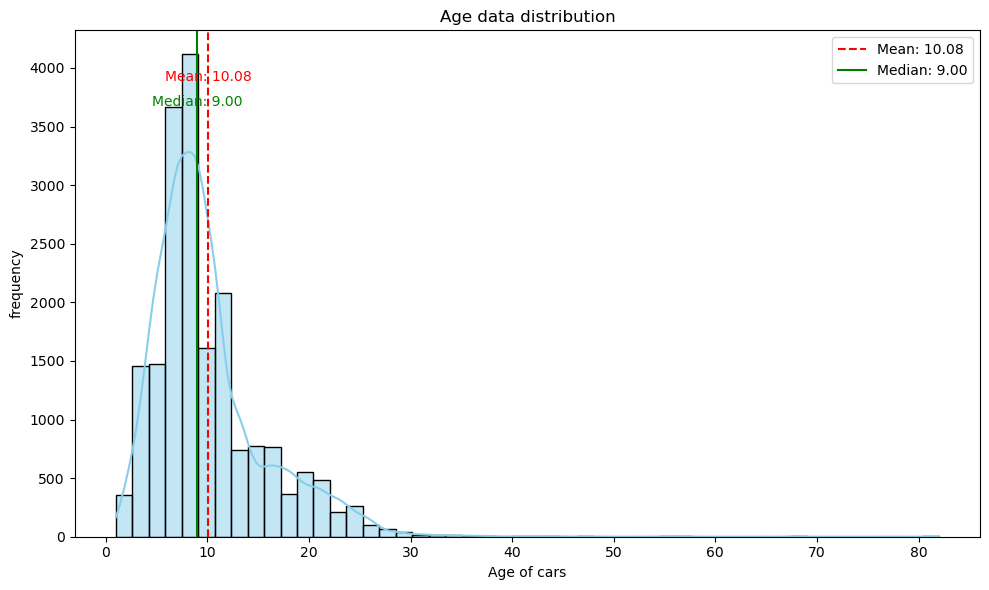

In [37]:
# as shown in the plot there's a righ skewness so we will have to deal with it
 
plot_dist(df['age'] , x_label='Age of cars' , title='Age data distribution')

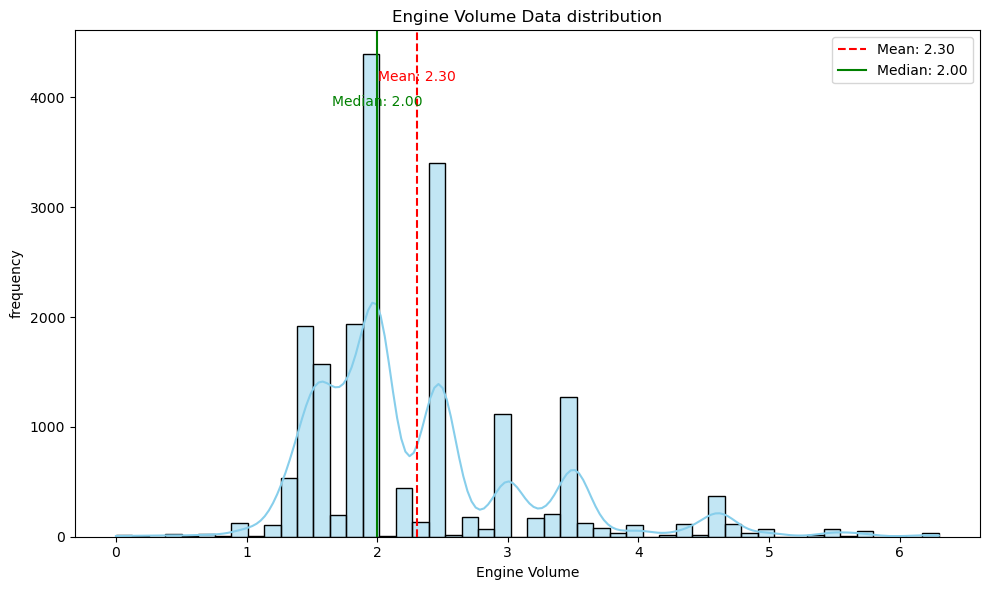

In [38]:
plot_dist(df['Engine volume'],'Engine Volume','Engine Volume Data distribution')

In [39]:
df['Cylinders'].value_counts()

4.0     14357
6.0      3452
8.0       983
5.0       169
3.0       107
2.0        42
1.0        37
12.0       36
10.0       12
16.0        5
Name: Cylinders, dtype: int64

In [40]:
def count_plot (df , column , ax):
    sns.countplot(data=df, x=column, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_title(f"{column} Count")

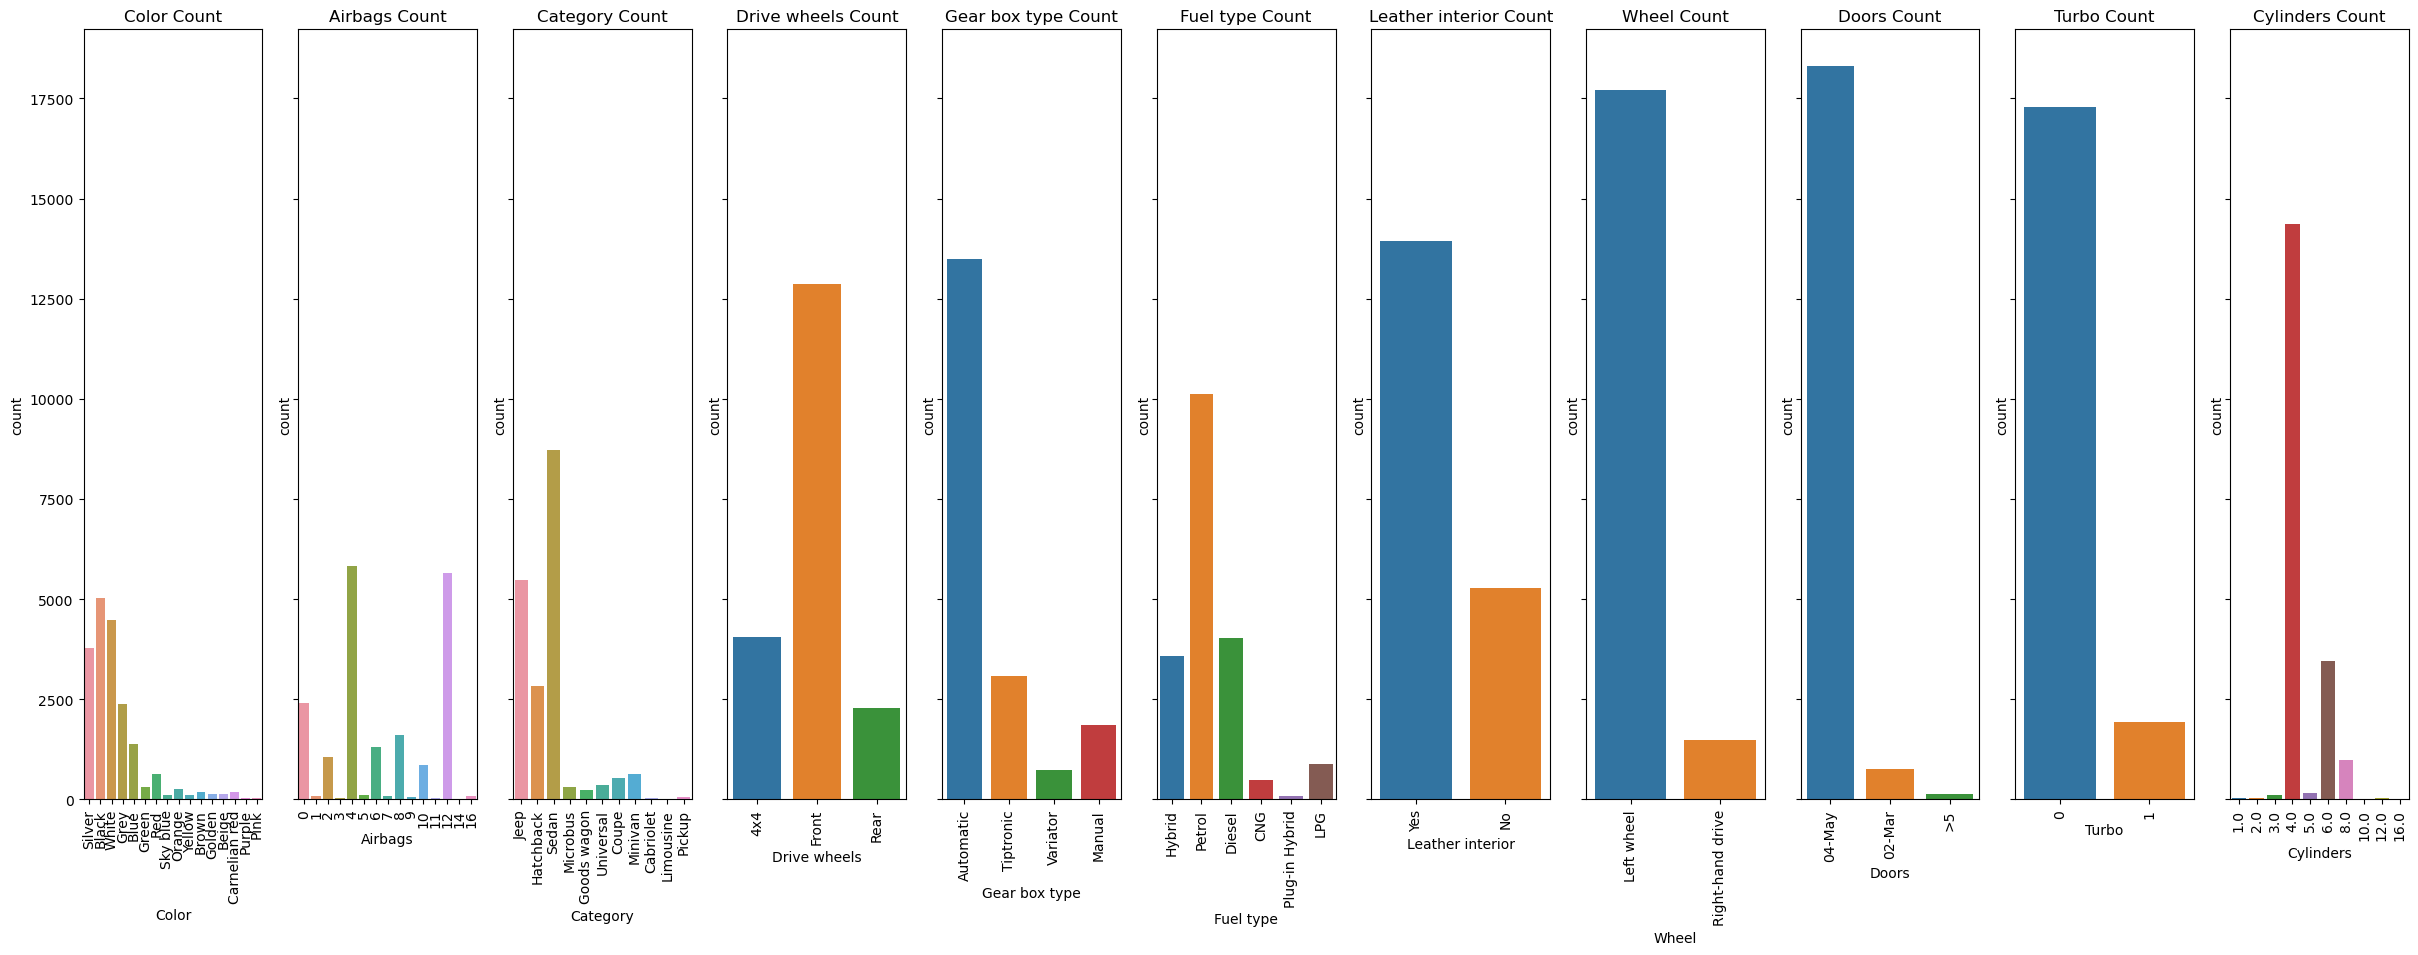

In [41]:
cat_features = ['Color' , 'Airbags' , 'Category' , 'Drive wheels' , 'Gear box type' ,'Fuel type' , 'Leather interior' , 'Wheel' , 'Doors','Turbo' , 'Cylinders']

fig, axes = plt.subplots(1, len(cat_features), figsize=(30, 10), sharey=True)

# Iterate through the categorical features and plot on subplots
for ax, category in zip(axes, cat_features):
    count_plot(df, category, ax)

<h2>Removing Outliers</h2>

In [42]:
# Handling outliers - IQR Method

def remove_outlier(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    upper_limit = Q3 + (IQR * 1.5)
    lower_limit = Q1 - (IQR * 1.5)

    
    return df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]

In [43]:
def box_plot(column):
    sns.boxplot(x=column ,palette="Set2",showmeans=True)
    plt.show()

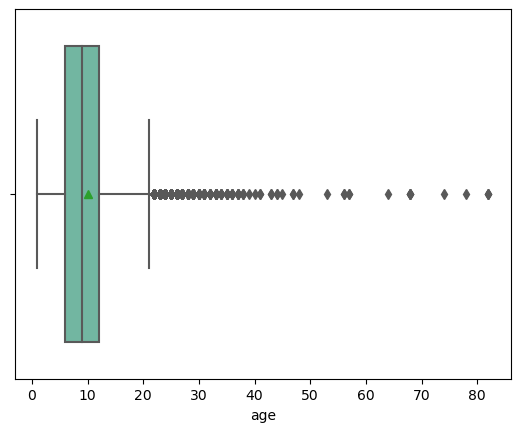

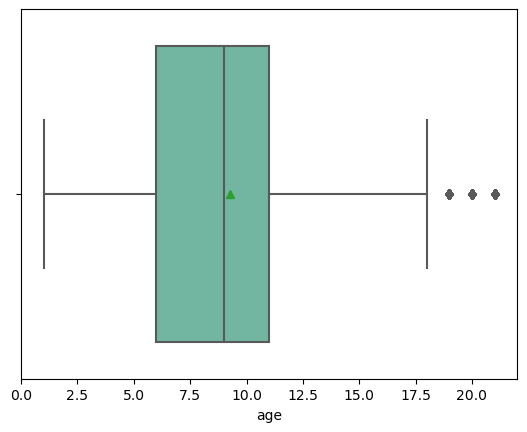

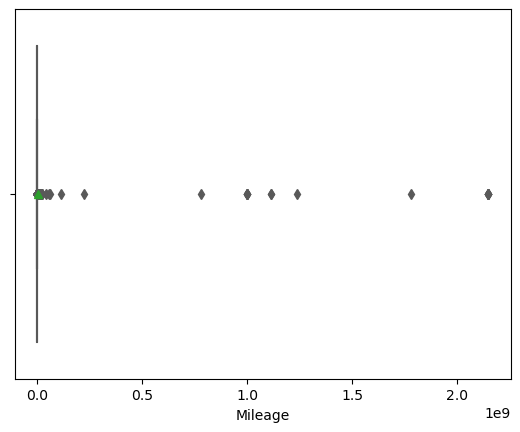

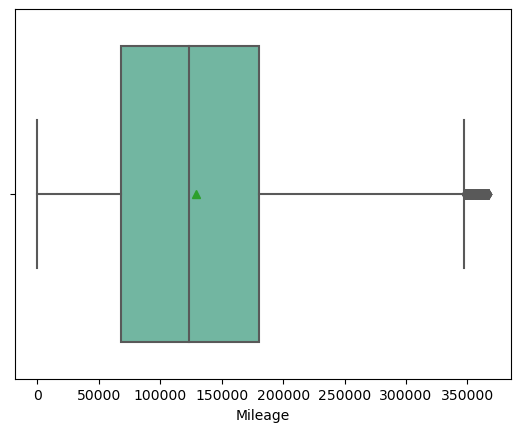

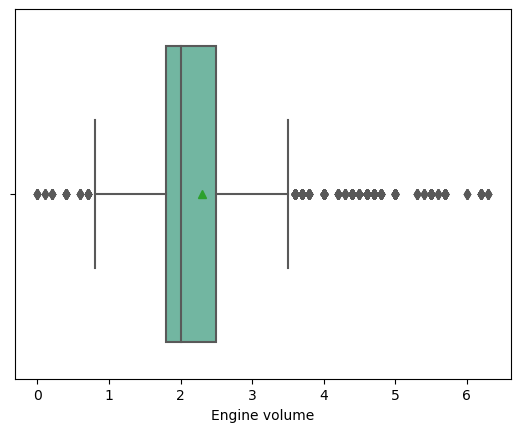

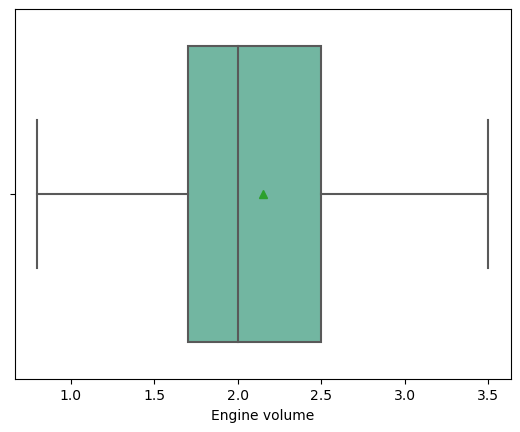

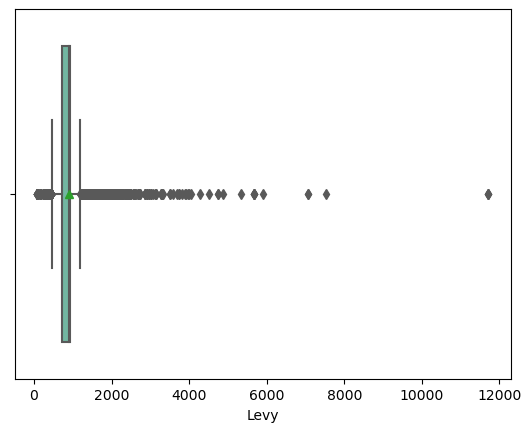

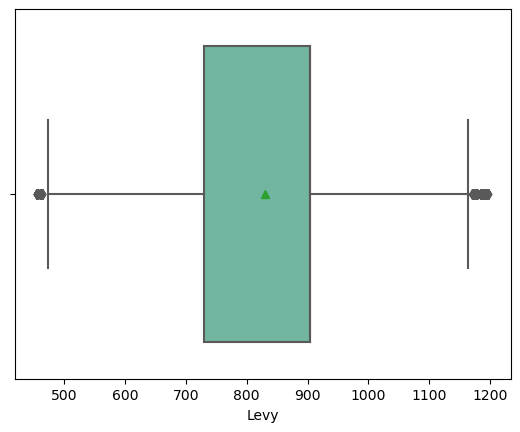

In [44]:
num_features = ['age' , 'Mileage','Engine volume','Levy']

for i in num_features:

    box_plot(df[i])

    df_filtered =  remove_outlier(df , column=i)

    box_plot(df_filtered[i])    

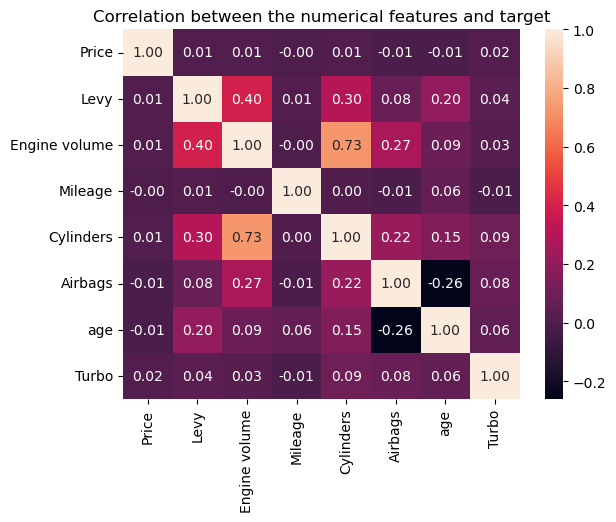

In [45]:
corr = df_filtered.corr()
sns.heatmap(data=corr , annot=True , fmt=".2f")
plt.title('Correlation between the numerical features and target')
plt.show()

<h2>So from the prev heatmap we can see that there's a strong correlation between the Engine volume and the Cylinders feature</h2>

# Pre-Processing

In [46]:
df_filtered.shape

(16060, 18)

In [47]:
df_filtered.duplicated().sum()

2339

In [48]:
df_filtered.drop_duplicates(inplace=True)

C:\Users\ziad\AppData\Local\Temp\ipykernel_14352\2500908631.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop_duplicates(inplace=True)


In [49]:
df_filtered.shape

(13721, 18)

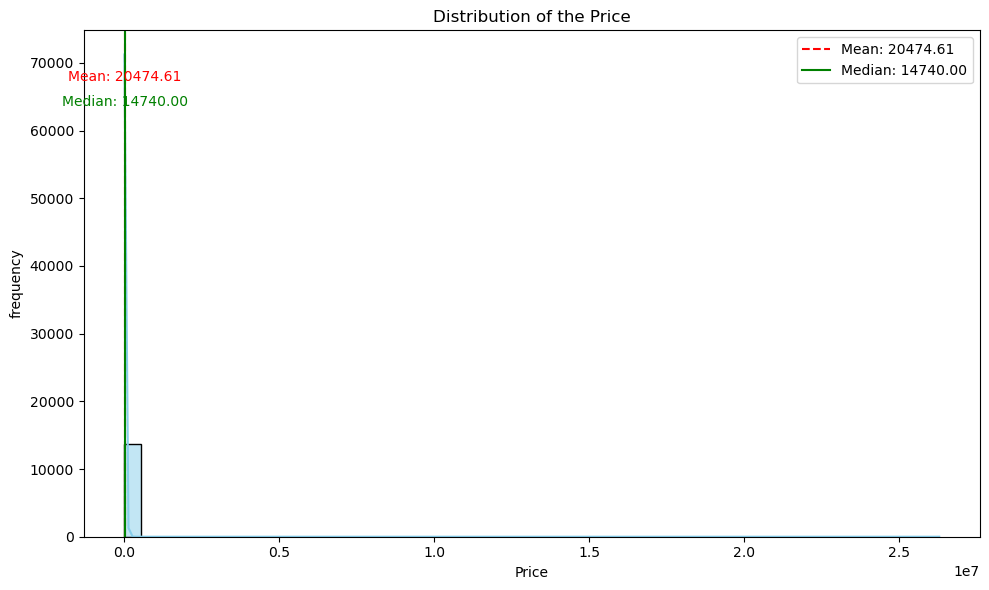

In [50]:
plot_dist(df_filtered['Price'] , 'Price' , 'Distribution of the Price')

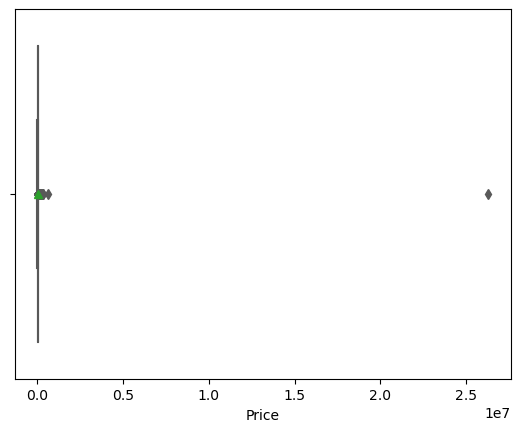

C:\Users\ziad\AppData\Local\Temp\ipykernel_14352\1939640380.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Price'] = remove_outlier(df_filtered , 'Price')


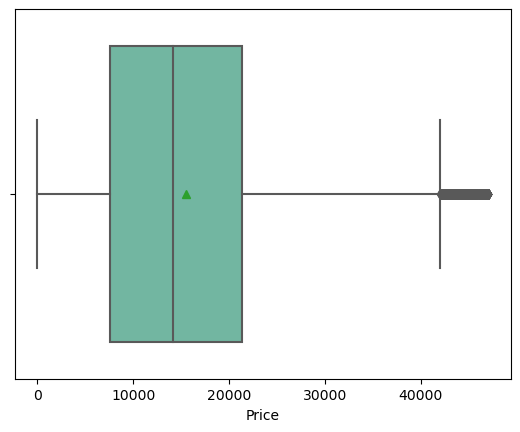

In [51]:
box_plot(df_filtered['Price'])

df_filtered['Price'] = remove_outlier(df_filtered , 'Price')

box_plot(df_filtered['Price'])

In [52]:
df_filtered['Price'] = pd.to_numeric(df_filtered['Price'], errors='coerce')

df_filtered['Price'].fillna(df_filtered['Price'].median() , inplace=True)

C:\Users\ziad\AppData\Local\Temp\ipykernel_14352\2658760023.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Price'] = pd.to_numeric(df_filtered['Price'], errors='coerce')
c:\Users\ziad\.conda\envs\TensorFlow\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [53]:
df_filtered['Price'].isna().sum()

0

C:\Users\ziad\AppData\Local\Temp\ipykernel_14352\828687898.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['scaled_price'] = transformer.fit_transform(df_filtered[['Price']])


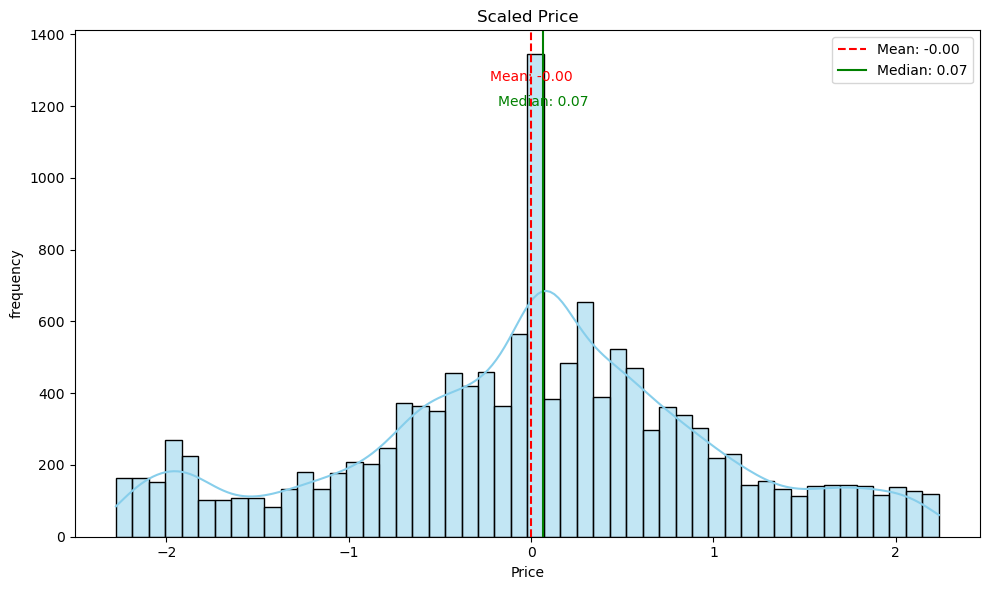

In [54]:
from sklearn.preprocessing import PowerTransformer

transformer = PowerTransformer(method='yeo-johnson')


df_filtered['scaled_price'] = transformer.fit_transform(df_filtered[['Price']])

plot_dist(df_filtered['scaled_price'] , 'Price' , 'Scaled Price')

In [55]:
df_filtered.drop(['Price'] , axis=1 , inplace=True)

c:\Users\ziad\.conda\envs\TensorFlow\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [56]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OneHotEncoder  , PowerTransformer , OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest , mutual_info_regression
from category_encoders import LeaveOneOutEncoder

X = df_filtered.drop(['scaled_price'] , axis=1)
y = df_filtered['scaled_price']

X_train1 , X_test , y_train1 , y_test = train_test_split(X,y , test_size= 0.25 , random_state=42 )

X_train2 , X_valid , y_train2 , y_valid = train_test_split(X_train1 , y_train1 , test_size=0.15 , random_state=42)

In [57]:
X_train2.shape , y_train2.shape , X_valid.shape , y_valid.shape , X_test.shape , y_test.shape

((8746, 17), (8746,), (1544, 17), (1544,), (3431, 17), (3431,))

In [58]:
X_train2.columns 

Index(['Levy', 'Category', 'Leather interior', 'Fuel type', 'Engine volume',
       'Mileage', 'Cylinders', 'Gear box type', 'Drive wheels', 'Doors',
       'Wheel', 'Color', 'Airbags', 'age', 'Turbo', 'Model_grouped',
       'Manufacturer_grouped'],
      dtype='object')

In [59]:
cat_features = [col for col in df_filtered.columns if col not in num_features and col != 'scaled_price' and col not in ['Cylinders', 'Category', 'Airbags', 'Turbo','Manufacturer_grouped','Model_grouped']]

cat_features2 = ['Manufacturer_grouped', 'Model_grouped', 'Category']


# cat_features.remove('Leather interior')


print(num_features)
print(cat_features)

['age', 'Mileage', 'Engine volume', 'Levy']
['Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color']


# Pre-Processing Pipelines

In [60]:
cat_pipeline = Pipeline(steps=[('OneHotEncoder',OneHotEncoder(handle_unknown='ignore')),
                               ('FeatureSelection',SelectKBest(mutual_info_regression,k=10))])

cat_pipeline2 = Pipeline(steps=[('LeaveOneEncoder' , LeaveOneOutEncoder(handle_missing='ignore')) , 
                                ('Scaler',PowerTransformer())
                                ])

numerical_Pipeline = Pipeline(steps=[('scaler',PowerTransformer())])

In [61]:
preprocessor = ColumnTransformer(transformers=[
        ('numerical_pipeline',numerical_Pipeline,num_features),
        ('cat_pipeline',cat_pipeline , cat_features),
        ('cat_pipeline2',cat_pipeline2 , cat_features2)]) 

In [62]:
X_train_processed = preprocessor.fit_transform(X_train2 , y_train2)
X_valid_processed = preprocessor.transform(X_valid)
X_test_processed = preprocessor.transform(X_test)

In [63]:
X_valid.columns

Index(['Levy', 'Category', 'Leather interior', 'Fuel type', 'Engine volume',
       'Mileage', 'Cylinders', 'Gear box type', 'Drive wheels', 'Doors',
       'Wheel', 'Color', 'Airbags', 'age', 'Turbo', 'Model_grouped',
       'Manufacturer_grouped'],
      dtype='object')

In [64]:
X_train_processed.shape , X_valid_processed.shape

((8746, 17), (1544, 17))

# Modeling

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error , mean_squared_error

In [66]:
# Initialize the KNN model
KNNmodel = KNeighborsRegressor()

# Define the parameter grid for KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9 ,11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],  # Minkowski distance: p=1 (Manhattan), p=2 (Euclidean)
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=KNNmodel,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # Optimize for MSE
    verbose=2,
    n_jobs=-1  # Use all available cores
)

# Fit the model with the training data
grid_search.fit(X_train_processed, y_train2)

# Get the best parameters and the corresponding score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated MSE:", -grid_search.best_score_)

# Use the best model to predict on validation and test datasets
best_model = grid_search.best_estimator_

val_predictions = best_model.predict(X_valid_processed)
test_predictions = best_model.predict(X_test_processed)

# Calculate MSE for validation and test sets
val_mse = mean_squared_error(y_valid, val_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

# Calculate MAE for validation and test sets
val_mae = mean_absolute_error(y_valid, val_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

print("Validation MSE:", val_mse)
print("Testing MSE:", test_mse)

print("Validation MAE:", val_mae)
print("Testing MAE:", test_mae)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.8s finished


Best Parameters: {'n_neighbors': 11, 'p': 1, 'weights': 'distance'}
Best Cross-Validated MSE: 0.46126609307259914
Validation MSE: 0.48603936995690067
Testing MSE: 0.4828311701575631
Validation MAE: 0.4587873296175841
Testing MAE: 0.4689380519470751


In [67]:
best_model.score(X_train_processed , y_train2)

1.0

In [68]:
best_model.score(X_valid_processed , y_valid)

0.5088294361042212

In [69]:
best_model.score(X_test_processed , y_test)

0.5198659174986845

In [70]:
lr = LinearRegression()

lr.fit(X_train_processed , y_train2)

y_pred_lr = lr.predict(X_test_processed)

print(f"MSE {mean_squared_error(y_true= y_test , y_pred=y_pred_lr)}")
print(f"MAE {mean_absolute_error(y_true= y_test , y_pred=y_pred_lr)}")
print(lr.score(X_train_processed , y_train2))
print(lr.score(X_test_processed , y_test))

MSE 0.7261047669886713
MAE 0.6460800758071019
0.29486942035934505
0.27795124332140986


In [71]:
y_test_inverted = transformer.inverse_transform(np.array(y_test).reshape(-1,1))
y_pred_knn_inverted = transformer.inverse_transform(np.array(test_predictions).reshape(-1,1))
y_pred_lr_inverted = transformer.inverse_transform(np.array(y_pred_lr).reshape(-1,1))

In [72]:
# Stack the arrays column-wise
data = np.hstack((y_pred_lr_inverted, y_pred_knn_inverted, y_test_inverted))

# Create the DataFrame
Prediction = pd.DataFrame(data, columns=['Linear Regression predictions', 'KNN predictions', 'Actual Values'])

# Display the first few rows
Prediction.head()


,Linear Regression predictions,KNN predictions,Actual Values
0,18867.158518,22030.665150,19736.0
1,6072.125861,5170.393164,3136.0
2,6787.281241,5734.305793,6272.0
3,13473.021486,12572.180031,13150.0
4,24959.025711,23200.406915,14113.0


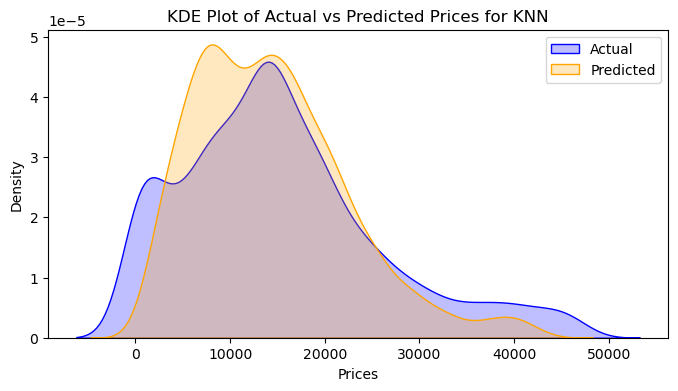

In [73]:
# Plot the KDE plot for actual vs predicted values
plt.figure(figsize=(8, 4))
sns.kdeplot(data=Prediction, x='Actual Values', label='Actual', fill=True, common_norm=False, color='blue')
sns.kdeplot(data=Prediction, x='KNN predictions', label='Predicted', fill=True, common_norm=False, color='orange')
plt.title('KDE Plot of Actual vs Predicted Prices for KNN')
plt.xlabel('Prices')
plt.ylabel('Density')
plt.legend()
plt.show()

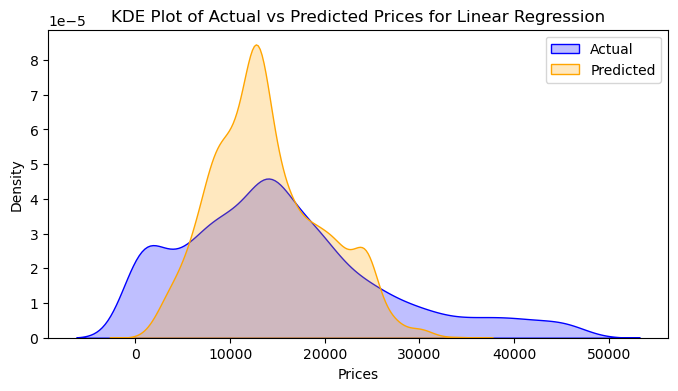

In [74]:
# Plot the KDE plot for actual vs predicted values
plt.figure(figsize=(8, 4))
sns.kdeplot(data=Prediction, x='Actual Values', label='Actual', fill=True, common_norm=False, color='blue')
sns.kdeplot(data=Prediction, x='Linear Regression predictions', label='Predicted', fill=True, common_norm=False, color='orange')
plt.title('KDE Plot of Actual vs Predicted Prices for Linear Regression')
plt.xlabel('Prices')
plt.ylabel('Density')
plt.legend()
plt.show()

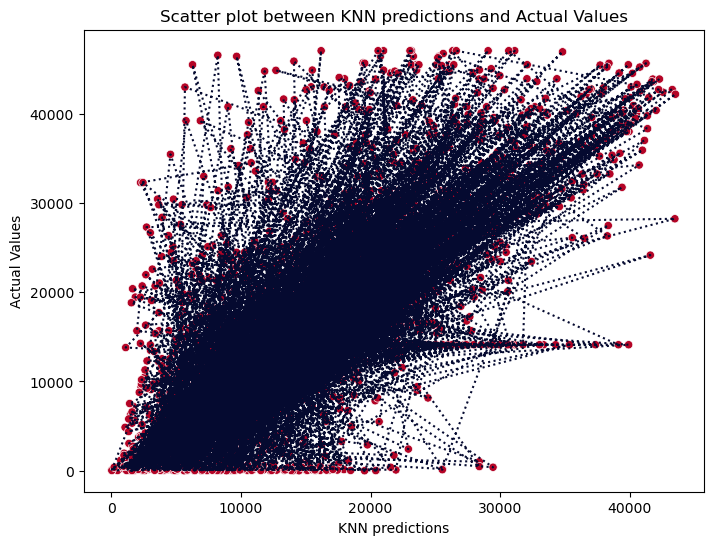

In [94]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=Prediction['KNN predictions'], y=Prediction['Actual Values'], color=sns.color_palette("coolwarm", as_cmap=True)(Prediction['Actual Values']))
plt.plot(Prediction['KNN predictions'], Prediction['Actual Values'], ls=':', color='#050a30')
plt.title("Scatter plot between KNN predictions and Actual Values")
plt.xlabel("KNN predictions")
plt.ylabel("Actual Values")
plt.show()

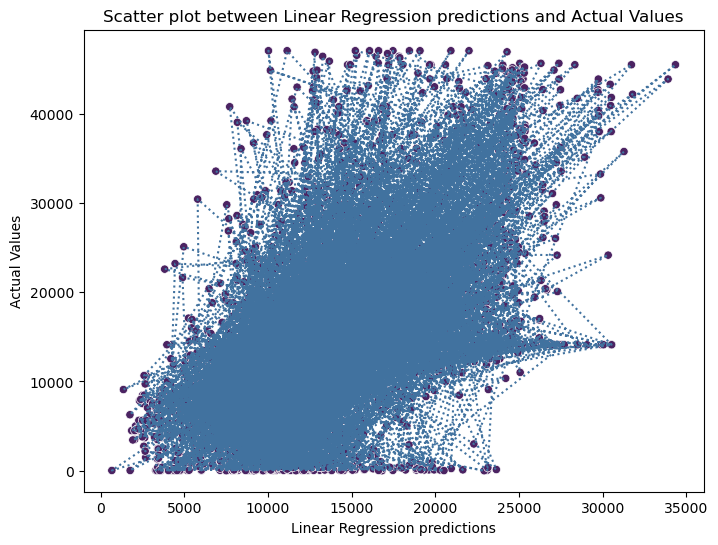

In [101]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=Prediction['Linear Regression predictions'], y=Prediction['Actual Values'], color=sns.color_palette("flare", as_cmap=True)(Prediction['Actual Values']))
plt.plot(Prediction['Linear Regression predictions'], Prediction['Actual Values'], ls=':', color='#41729f')
plt.title("Scatter plot between Linear Regression predictions and Actual Values")
plt.xlabel("Linear Regression predictions")
plt.ylabel("Actual Values")
plt.show()

# Saving Model

In [ ]:
import joblib

# Save the pipeline to a file
joblib.dump(preprocessor, 'Pre_Processing_pipeline.pkl')

# saving the KNN model 

joblib.dump(best_model , 'KNN_Model.pkl')

# saving the linear regression 

joblib.dump(lr , 'Linear_Regression.pkl')

['Linear_Regression']